In [ ]:
def graph_3d(data: pd.DataFrame, prediction: pd.Series, name: dict=None, axes: tuple=(0,1,2), opacity: dict=None, n_components=10):
    """Documentation
    Parameters:
        data : the data that will be show on the plot
        prediction : the prediction that will be used to make distinction bewteen the differents class on the plot
        name : clusters names (ex: {prediction_value: name})
        axes : axes of pca to display points
        opacity : the transparency of the points on the graph
    """

    if opacity is None:
        opacity: dict = {val:1 for val in set(prediction)}
    
    if name is None:
        name: dict = {val:str(val) for val in set(prediction)}

    sc: StandardScaler = StandardScaler()
    X: np.ndarray = sc.fit_transform(data)

    pca: PCA = PCA(n_components=n_components) # ACP très rapide 
    # pca = TSNE(n_components=3) # TSNE Très très long
    X: np.ndarray = pca.fit_transform(X)

    data_plot: pd.DataFrame = pd.DataFrame(X)
    data_plot["prediction"] = prediction
    # data_plot["prediction"] = prediction.replace([-1,1], name)

    data: list = []
    for val in set(prediction):
        data_semi_plot: pd.DataFrame = data_plot[data_plot["prediction"] == val]
        data.append(go.Scatter3d(x=data_semi_plot[axes[0]], y=data_semi_plot[axes[1]], z=data_semi_plot[axes[2]], name=name[val], mode='markers',marker=dict(size=6), opacity=opacity[val]))

    fig: go.Figure = go.Figure(data)
    fig.show()




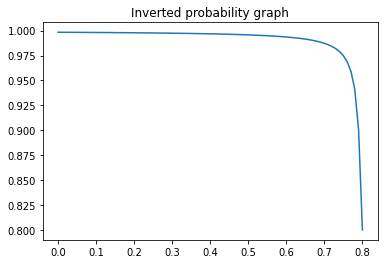

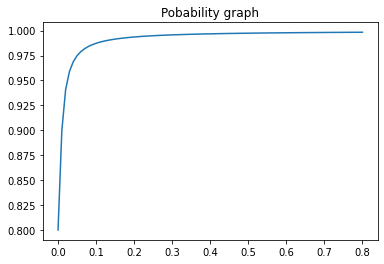

In [27]:
# Utilie pour généré de l'aléatoire pondéré pour dire si un doc est innovant ou pas
def score_to_threshold(x: int) -> int:
    """Documentation
    Parameters:
        x: Innovation score associated with an article
    Out:
        Threshold probability used to differentiate innovative from non-innovative documents
    """
    return np.arctan(x * 100) / np.pi * 2 * 0.2 + 0.8

seuil = 0.80
x: np.ndarray = np.arange(0, seuil + 0.001, step=0.01)
plt.plot(x, score_to_threshold(seuil - x))
plt.title("Inverted probability graph")
plt.show()
x: np.ndarray = np.arange(0, seuil + 0.001, step=0.01)
plt.plot(x, score_to_threshold(x))
plt.title("Pobability graph")
plt.show()

In [2]:
def innovation(data_nb1: list, data_nb2: list, data_ratio1: list, data_ratio2: list) -> list:
  res: list = []
  seuil: int = 0.25
  for i in tqdm(range(len(data_nb1))):
    valeur = data_nb1[i]*data_ratio1[i] + (data_nb2[i]*data_ratio2[i])
    alea = np.random.random()
    if valeur > seuil:
        res.append(1)
    elif (valeur < seuil) & (data_nb1[i] == 0) & (data_nb2[i] == 0):
        res.append(0)
    elif (valeur < seuil) & (data_ratio1[i] < 0.0002) & (data_ratio2[i] < 0.0005):
        res.append(0)
    else:
        if valeur > seuil / 2 and alea > score_to_threshold((seuil - valeur)):
            res.append(1)
        elif valeur < seuil / 2 and alea > score_to_threshold(valeur):
            res.append(0)
        else:
            res.append('?')
  return res

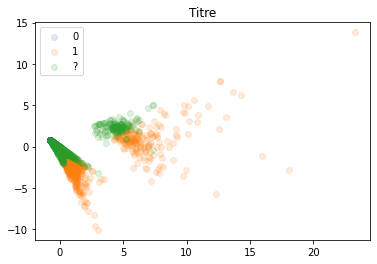

In [ ]:
# 0: No innovation
# 1: Innovation
# ?: Unclassified
graph_2d(df[['nb_key_words','nb_key_words_title','ratio_key_words','ratio_key_word_title']], df["innovation_detection"], dic_values={0:0, 1:1, "?":"?"})

In [ ]:
# 0: No innovation
# 1: Innovation
# ?: Unclassified
graph_3d(df[['nb_key_words','nb_key_words_title','ratio_key_words','ratio_key_word_title']], df["innovation_detection"], opacity={0:1, 1:0.5, "?":0.5},n_components=3)